In [1]:
!pip install --upgrade cmdstanpy
!install_cmdstan

     |████████████████████████████████| 69 kB 3.3 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.1 which is incompatible.
Installing CmdStan version: 2.29.2
Install directory: /root/.cmdstan
Download successful, file: /tmp/tmpocoxwpgw
Extracting distribution
Unpacked download as cmdstan-2.29.2
Building version cmdstan-2.29.2, may take several minutes, depending on your system.
Test model compilation
Installed cmdstan-2.29.2
INFO:cmdstanpy:deleting tmpfiles dir: /tmp/tmp07o111kf
INFO:cmdstanpy:done


In [4]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
F = len('Dominik')
L = len('Wozniak')
N = (L+F) * 100

In [6]:
# ex 1)
# Compile code_1.stan and code_2.stan

In [8]:
model1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /content/code_1.stan to exe file /content/code_1
INFO:cmdstanpy:compiled model executable: /content/code_1


In [9]:
model2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:compiling stan file /content/code_2.stan to exe file /content/code_2
INFO:cmdstanpy:compiled model executable: /content/code_2


In [10]:
# Generate data for rest of excercises

In [11]:
stan_data =  {
    'N' :N
}

In [12]:
samples_model1 = model1.sample(data=stan_data)
y1 = samples_model1.stan_variable(var='y')

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [13]:
samples_model2 = model2.sample(data=stan_data)
y2 = samples_model2.stan_variable(var='y')

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [14]:
# ex 2)
# compile both models
model3 = CmdStanModel(stan_file='code_3.stan')
model4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:compiling stan file /content/code_3.stan to exe file /content/code_3
INFO:cmdstanpy:compiled model executable: /content/code_3
INFO:cmdstanpy:compiling stan file /content/code_4.stan to exe file /content/code_4
INFO:cmdstanpy:compiled model executable: /content/code_4


In [15]:
# fit both models
stan_data={'N': N, 'y': y1[0]}
fit_3 = model3.sample(data=stan_data)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [16]:
stan_data={'N': N, 'y': y2[0]}
fit_4 = model4.sample(data=stan_data)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [17]:
# Using az.compare and az.plot_compare analyze both models using loo and waic criteria

In [19]:
compare = {
    "model_3": fit_3,
    "model_4": fit_4
}

def compare_models(data_dict, type):
    model_loo=az.compare(data_dict, ic=type)
    az.plot_compare(model_loo)


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:812: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


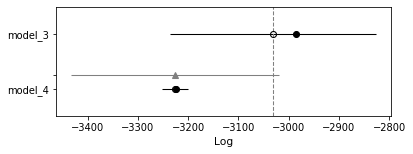

In [20]:
compare_models(compare, 'loo')

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1637: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


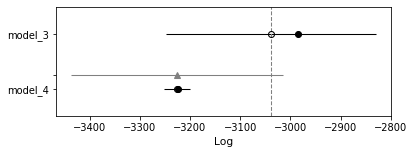

In [21]:
compare_models(compare, 'waic')

In [22]:
# ex 3)
# compile model


In [23]:
# compare models for 1, 2 and 3 predictors as in previous excercise

In [24]:
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /content/code_5.stan to exe file /content/code_5
INFO:cmdstanpy:compiled model executable: /content/code_5


In [25]:
y_hat=fit_4.stan_variable('y_hat')

X1=y_hat[0:1].transpose() 
data5_1= {
    "N": N,
    "K": 1,
    "y": y2[0],
    "X": X1
}

fit5_1=model5.sample(data=data5_1)
X2=y_hat[0:2].transpose()
data5_2 = {
    "N": N,
    "K": 2,
    "y": y2[0],
    "X": X2
}

fit5_2=model5.sample(data=data5_2)
X3=y_hat[0:3].transpose()

data5_3 = {
    "N": N,
    "K": 3,
    "y": y2[0],
    "X": X3
}
fit5_3=model5.sample(data=data5_3)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [26]:
compare = {
    "model5_1": fit5_1,
    "model5_2": fit5_2,
    "model5_3": fit5_3
}

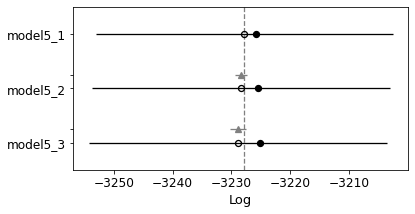

In [27]:
compare_models(compare, 'loo')

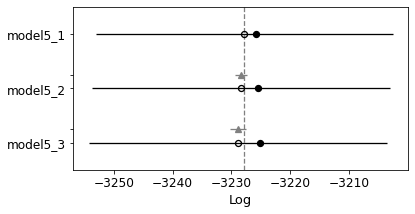

In [28]:
compare_models(compare, 'waic')